Datasets links :

https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from matplotlib.colors import ListedColormap
import seaborn as sns

# 1) Load the HeartDiseaseUCI dataset and display it. Pay attention to the first column

In [143]:
df = pd.read_csv('./processed.cleveland.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [144]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

In [145]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# 2) Display the shape and description of the dataset

In [146]:
df.shape

(303, 14)

In [147]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


# 3) Delete the values to Nan and check the shape

In [148]:
# CHECK AGAINNASKDFJLASDJFKLSADJLFK
df2 = df.dropna(inplace=True)

In [149]:
df.shape

(303, 14)

# 4) Display the number of classes in this dataset

In [150]:
df['cp'].value_counts()

4.0    144
3.0     86
2.0     50
1.0     23
Name: cp, dtype: int64

# 5) Display the scatter plot matrix and the correlation matrix

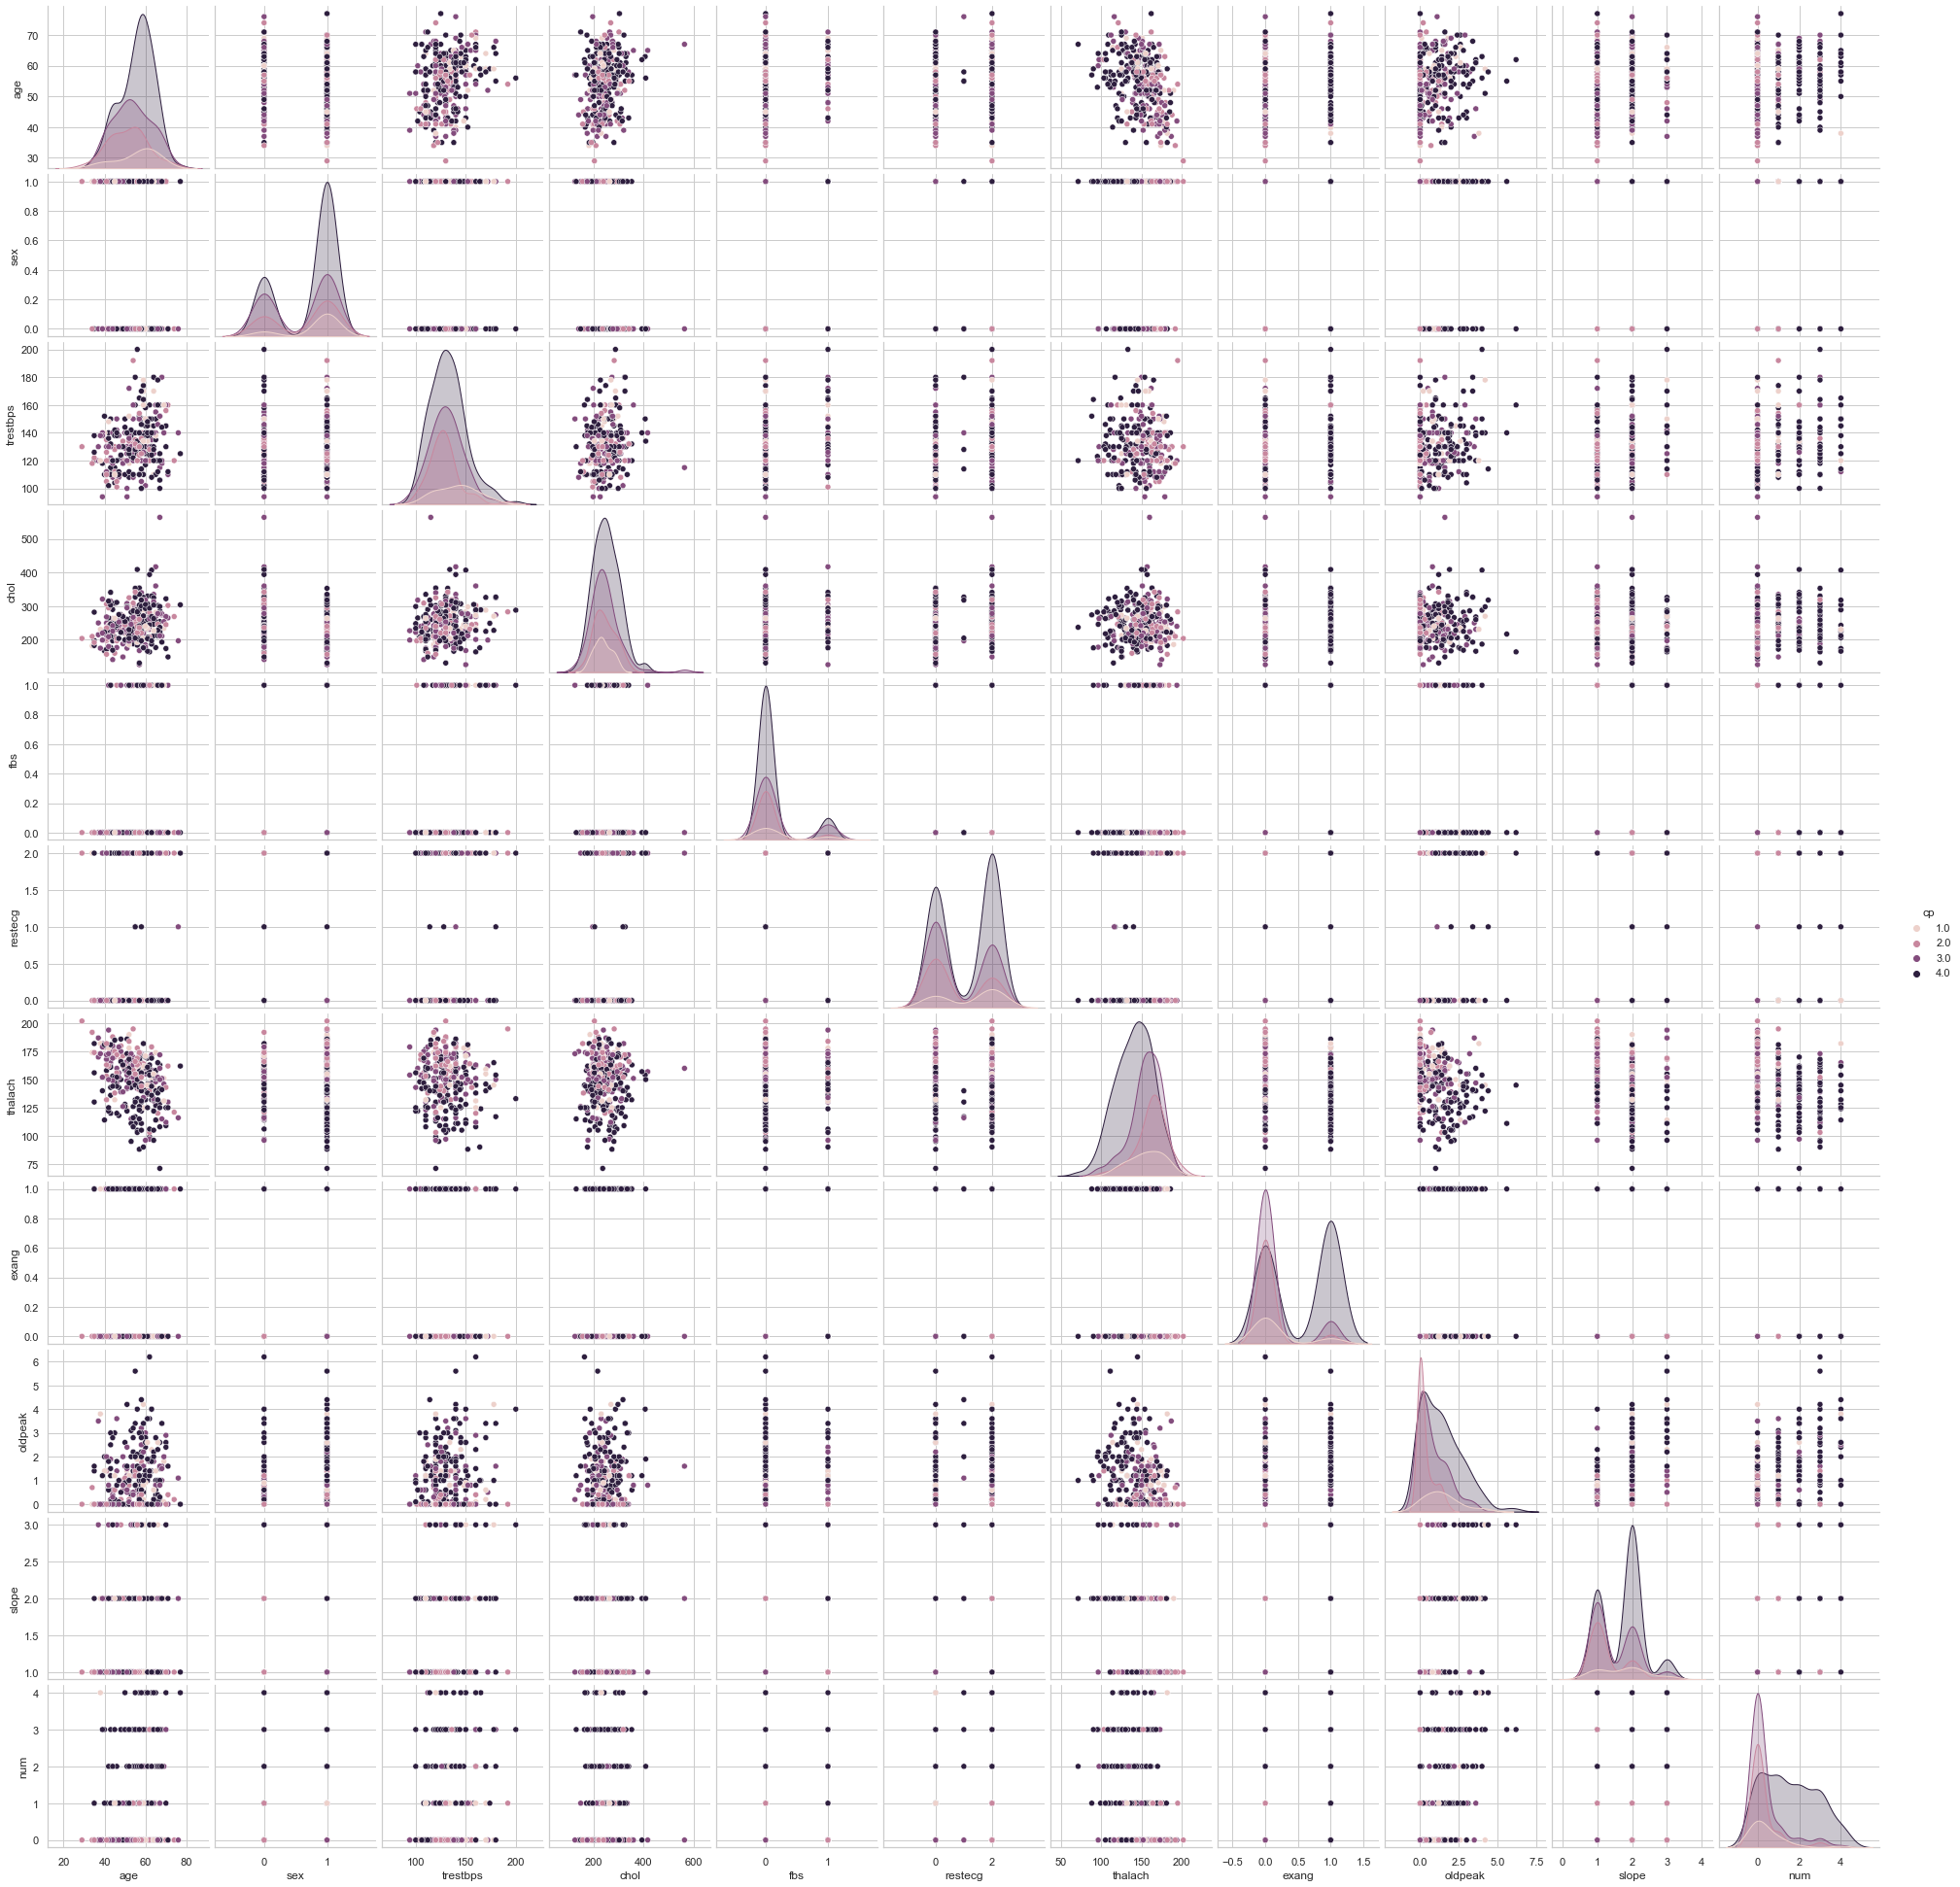

In [151]:
# scatter plot matrix
sns.set(style="whitegrid", color_codes=True)
sns.pairplot(df, hue="cp")
plt.show()

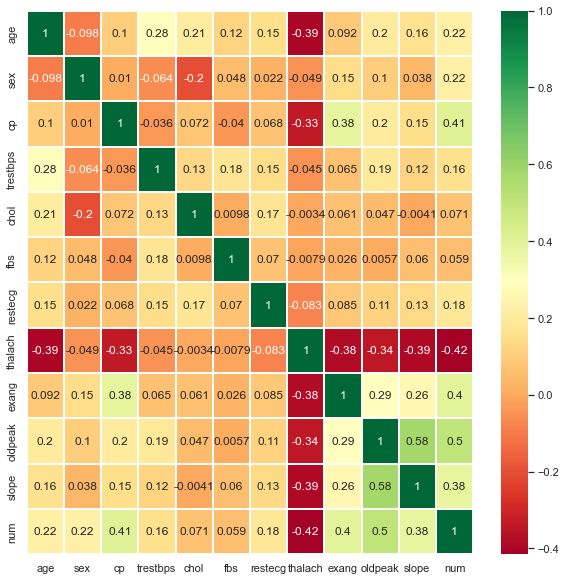

In [152]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
plt.show()

# 6) Create the variables X and y. Using a Sklearn MinMaxScaler, reduce the values between 0 and 1 of X. Display the mean and variance of X.

In [153]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing


# Create the variables X and y. 
X = df.drop(['num'], axis=1)
y = df['num']


In [154]:
X.drop(['ca', 'thal'], axis=1, inplace=True)

In [155]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [156]:
print(X.mean())
print(X.var())

0.4180724808223527
0.14020804593790803


# 7) Split the dataset into trains and tests, train an SKlearn Perceptron, display the classification_report

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score


perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.32786885245901637


In [159]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.52      0.68        29
           1       0.08      0.08      0.08        12
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         7
           4       0.13      1.00      0.24         4

    accuracy                           0.33        61
   macro avg       0.24      0.32      0.20        61
weighted avg       0.50      0.33      0.36        61



/Users/zx/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zx/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zx/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

# 8) Display the type of variables in the dataset. Transform the relevant variables into categorical variables

In [160]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

# 9) Transforming qualitative variables into quantitative variables

In [161]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [162]:
# one hot encoding
df_onehot = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'slope'])
df_onehot.head()

,age,trestbps,chol,restecg,thalach,exang,oldpeak,ca,thal,num,...,sex_1.0,cp_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_0.0,fbs_1.0,slope_1.0,slope_2.0,slope_3.0
0,63.0,145.0,233.0,2.0,150.0,0.0,2.3,0.0,6.0,0,...,1,1,0,0,0,0,1,0,0,1
1,67.0,160.0,286.0,2.0,108.0,1.0,1.5,3.0,3.0,2,...,1,0,0,0,1,1,0,0,1,0
2,67.0,120.0,229.0,2.0,129.0,1.0,2.6,2.0,7.0,1,...,1,0,0,0,1,1,0,0,1,0
3,37.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,3.0,0,...,1,0,0,1,0,1,0,0,0,1
4,41.0,130.0,204.0,2.0,172.0,0.0,1.4,0.0,3.0,0,...,0,0,1,0,0,1,0,1,0,0


# 10) Define X and y again from this new dataframe, redo a MinMaxScaler, split into train and test, train a Perceptron, what is the difference in result?

In [163]:
X = df_onehot.drop(['num'], axis=1)
y = df_onehot['num']

In [164]:
X.drop(['ca', 'thal'], axis=1, inplace=True)

In [165]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78        29
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         9
           3       0.19      0.71      0.30         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.18      0.32      0.22        61
weighted avg       0.36      0.49      0.41        61



/Users/zx/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zx/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zx/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

# 11) Repeat 9) with the same number of examples per class (see SKlearn's resample)

In [168]:
# sklearn resample
from sklearn.utils import resample


df_majority = df[df['num'] == 0]
df_minority = df[df['num'] == 1]
df_minority_upsampled = resample(df_minority,
                                    replace=True,     # sample with replacement
                                    n_samples=len(df_majority),    # to match majority class
                                    random_state=42) # reproducible results
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [169]:
print(df['num'].value_counts())
print(df_upsampled['num'].value_counts())
print(df_upsampled.shape)

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64
0    164
1    164
Name: num, dtype: int64
(328, 14)


In [170]:
print(df_upsampled.mean())
print(df_upsampled.var())

age          53.728659
sex           0.689024
cp            3.134146
trestbps    130.984756
chol        246.893293
fbs           0.109756
restecg       0.966463
thalach     151.039634
exang         0.329268
oldpeak       0.870427
slope         1.551829
num           0.500000
dtype: float64
age           82.932265
sex            0.214925
cp             0.948311
trestbps     291.929431
chol        2290.915184
fbs            0.098009
restecg        0.998872
thalach      519.591697
exang          0.221526
oldpeak        0.891753
slope          0.345929
num            0.250765
dtype: float64


/var/folders/0k/369f7zf50c59w8dkhr5_kczr0000gn/T/ipykernel_39649/2625964637.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_upsampled.mean())
/var/folders/0k/369f7zf50c59w8dkhr5_kczr0000gn/T/ipykernel_39649/2625964637.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_upsampled.var())


In [171]:
classification_report(y_test, y_pred)

/Users/zx/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zx/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zx/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

'              precision    recall  f1-score   support\n\n           0       0.71      0.86      0.78        29\n           1       0.00      0.00      0.00        12\n           2       0.00      0.00      0.00         9\n           3       0.19      0.71      0.30         7\n           4       0.00      0.00      0.00         4\n\n    accuracy                           0.49        61\n   macro avg       0.18      0.32      0.22        61\nweighted avg       0.36      0.49      0.41        61\n'

# Bonus) Repeat questions 7 to 11 with a Multi-Layer Perceptron

## Ex2

# 12) Import the winequality dataset, pay attention to the header. Display the dataset, the shape, the statistical information and remove the Nan values. Display the correlations

In [172]:
df2 = pd.read_csv('./WineQT.csv')

In [173]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [174]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [175]:
df2.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [176]:
df2.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [177]:
X = df2.drop(['quality'], axis=1)
y = df2['quality']

In [178]:
print(X.shape)
print(y.shape)

(1143, 12)
(1143,)


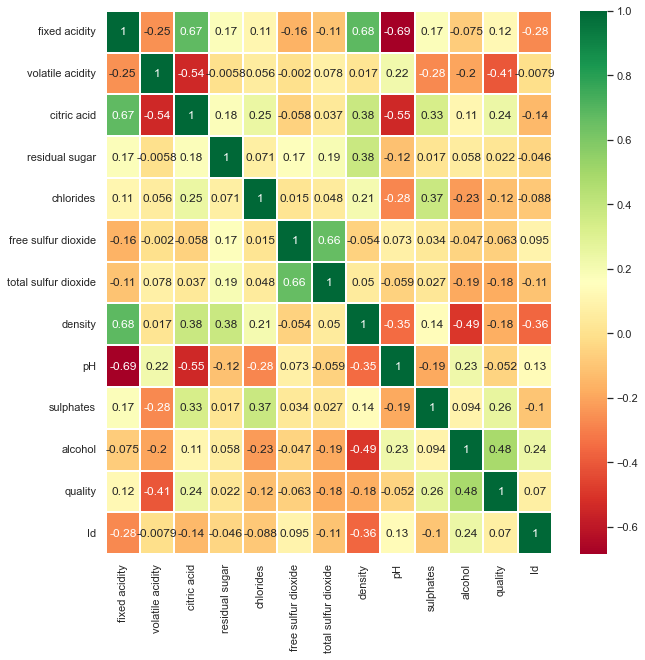

In [179]:
plt.figure(figsize=(10, 10))
sns.heatmap(df2.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
plt.show()

# 13) Perform a PCA on all variables, using the elbow rule determine the correct number of components and perform a new PCA. Display the result

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [181]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [182]:
print(pca.explained_variance_ratio_)

[0.99484303 0.00489187]


In [183]:
print(pca.components_[0])


[ 1.05195596e-03  2.70233485e-06  5.75575001e-05  1.34146749e-04
  1.20704069e-05 -2.51882828e-03  6.19900964e-03  1.56753134e-06
 -4.89348678e-05  3.89745688e-05 -6.04986364e-04 -9.99976865e-01]


In [184]:
print(pca.components_[1])

[-7.53030736e-03  3.51127280e-04  1.19572219e-04  7.59609657e-03
  6.52293644e-05  2.25188625e-01  9.74226878e-01  1.51497887e-06
 -8.63277108e-05  5.29872614e-05 -5.25457744e-03  5.46844815e-03]


In [185]:
components = pd.DataFrame(X_train)
components.columns = ['PC1', 'PC2']
components.head()

,PC1,PC2
0,799.878200,55.652594
1,-260.604618,-38.322168
2,-84.435391,-7.497328
3,-740.544385,-21.945550
4,-241.160506,47.134080


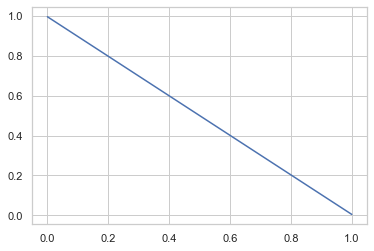

In [186]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

# 14) Display a 2-dimensional TSNE, what do you see?

In [187]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne.fit_transform(X_train)
tsne = pd.DataFrame(tsne.fit_transform(X_train))
tsne.columns = ['PC1', 'PC2', 'y']
tsne.head()

/Users/zx/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/zx/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 914 samples in 0.000s...
[t-SNE] Computed neighbors for 914 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 914 / 914
[t-SNE] Mean sigma: 33.366944
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.459873
[t-SNE] KL divergence after 300 iterations: 0.333384
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 914 samples in 0.000s...
[t-SNE] Computed neighbors for 914 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 914 / 914
[t-SNE] Mean sigma: 33.366944


/Users/zx/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/zx/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.353081
[t-SNE] KL divergence after 300 iterations: 0.306055


,PC1,PC2,y
0,0.757789,4.461206,10.252628
1,-9.442661,-4.691320,-2.215100
2,-2.867247,-5.940308,-6.345119
3,1.275459,10.104631,4.499557
4,-6.784011,-4.376964,-2.005351


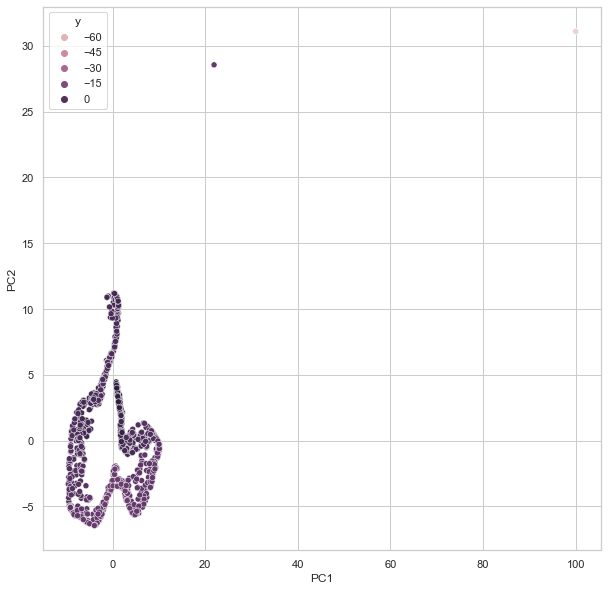

In [188]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue='y', data=tsne)
plt.show()

In [189]:
len(np.unique(df2.values[:,-1]))

1143

In [190]:
np.unique(df2.values[:,-1])

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.594e+03, 1.595e+03,
       1.597e+03])

In [191]:
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


# Classification

# 15) Prepare X and y data, split into train and test.
# 16) Define and train a MLP (neural network).
# 17) Display the loss and accuracy on the train and the validation set

In [192]:
from sklearn.model_selection import train_test_split


X = df2.drop(columns=['quality'])
y = df2['quality']

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25,random_state=2)
X_train_scaled = scaler.fit_transform(X_train)

In [193]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [194]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout


model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [195]:
from tensorflow.keras.callbacks import EarlyStopping


early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [196]:
history= model.fit(x=X_train_scaled,y=Y_train, validation_data=(X_test_scaled, Y_test), batch_size=2, epochs=20, callbacks=[early_stop])

Epoch 1/20
  1/429 [..............................] - ETA: 2:56 - loss: -0.3947

2022-07-13 16:16:30.072406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


429/429 [==============================] - ETA: 0s - loss: -4064.9863

2022-07-13 16:16:32.908051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


429/429 [==============================] - 3s 7ms/step - loss: -4064.9863 - val_loss: -17863.3438
Epoch 2/20
429/429 [==============================] - 3s 7ms/step - loss: -154788.4844 - val_loss: -320595.0312
Epoch 3/20
429/429 [==============================] - 3s 7ms/step - loss: -1045904.5625 - val_loss: -1533275.1250
Epoch 4/20
429/429 [==============================] - 4s 8ms/step - loss: -3542264.5000 - val_loss: -4358660.0000
Epoch 5/20
429/429 [==============================] - 3s 6ms/step - loss: -8575913.0000 - val_loss: -9555756.0000
Epoch 6/20
429/429 [==============================] - 3s 7ms/step - loss: -17097932.0000 - val_loss: -17903364.0000
Epoch 7/20
429/429 [==============================] - 3s 7ms/step - loss: -30046534.0000 - val_loss: -30089426.0000
Epoch 8/20
429/429 [==============================] - 4s 9ms/step - loss: -48228800.0000 - val_loss: -46716756.0000
Epoch 9/20
429/429 [==============================] - 3s 7ms/step - loss: -72568384.0000 - val_loss:

In [197]:
classification_report(Y_test, model.predict(X_test_scaled))

1/9 [==>...........................] - ETA: 1s

2022-07-13 16:17:29.519926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 0s 3ms/step


/Users/zx/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zx/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zx/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

'              precision    recall  f1-score   support\n\n         1.0       0.00      0.00      0.00       0.0\n         4.0       0.00      0.00      0.00      10.0\n         5.0       0.00      0.00      0.00     120.0\n         6.0       0.00      0.00      0.00     115.0\n         7.0       0.00      0.00      0.00      35.0\n         8.0       0.00      0.00      0.00       6.0\n\n    accuracy                           0.00     286.0\n   macro avg       0.00      0.00      0.00     286.0\nweighted avg       0.00      0.00      0.00     286.0\n'

In [198]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

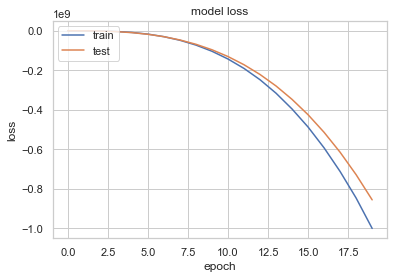

In [201]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

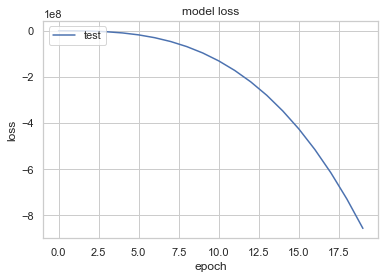

In [204]:
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()

# Regression

In [205]:
pip install tensorflow_addons

Note: you may need to restart the kernel to use updated packages.


In [209]:
import tensorflow as tf
import tensorflow_addons as tfa


result = tfa.metrics.RSquare(dtype=tf.float32)

# 18)-20) Same question as above with a regression problem. Use the result function as a metric

In [210]:
history= model.fit(x=X_train_scaled,y=Y_train, validation_data=(X_test_scaled, Y_test), batch_size=2, epochs=20, callbacks=[early_stop])

Epoch 1/20
429/429 [==============================] - 3s 7ms/step - loss: -1168553088.0000 - val_loss: -997645120.0000
Epoch 2/20
429/429 [==============================] - 3s 6ms/step - loss: -1359090176.0000 - val_loss: -1155209088.0000
Epoch 3/20
429/429 [==============================] - 3s 7ms/step - loss: -1565902208.0000 - val_loss: -1328772352.0000
Epoch 4/20
429/429 [==============================] - 3s 7ms/step - loss: -1796429440.0000 - val_loss: -1519718784.0000
Epoch 5/20
429/429 [==============================] - 3s 8ms/step - loss: -2049496064.0000 - val_loss: -1729615360.0000
Epoch 6/20
429/429 [==============================] - 3s 6ms/step - loss: -2326321152.0000 - val_loss: -1959093120.0000
Epoch 7/20
429/429 [==============================] - 3s 6ms/step - loss: -2629371136.0000 - val_loss: -2208748288.0000
Epoch 8/20
429/429 [==============================] - 3s 8ms/step - loss: -2958449152.0000 - val_loss: -2480303104.0000
Epoch 9/20
429/429 [=====================

In [211]:
pred = model.predict(X_test_scaled)

9/9 [==============================] - 0s 3ms/step


In [212]:
print(list(zip(y_test,pred))[:5])

[(5, array([1.], dtype=float32)), (6, array([1.], dtype=float32)), (5, array([1.], dtype=float32)), (6, array([1.], dtype=float32)), (6, array([1.], dtype=float32))]


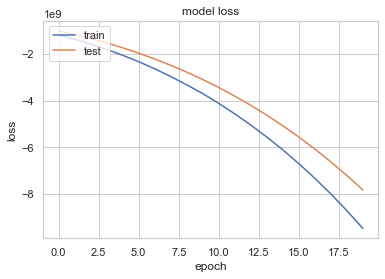

In [215]:
# plot of the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

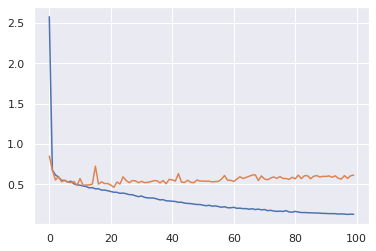

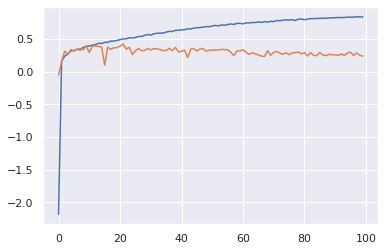

# Bonus) Competition between students, looking for the best architecture for regression and classification without overfitting... ! May the best one win !